In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv("VLagun_Phys_Years.csv")

In [6]:
dataset.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,Year_weak_wind
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,Year_weak_wind
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,Year_weak_wind
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,Year_weak_wind
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,Year_weak_wind


In [8]:
Year_weak_wind = dataset[dataset.Years == "Year_weak_wind"]
Year_strong_wind = dataset[dataset.Years == "Year_strong_wind"]

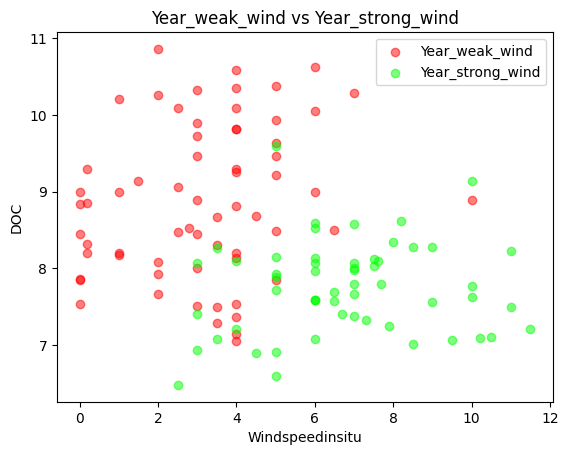

In [9]:
plt.title("Year_weak_wind vs Year_strong_wind")
plt.xlabel("Windspeedinsitu")
plt.ylabel("DOC")
plt.scatter(Year_weak_wind.Windspeedinsitu, Year_weak_wind.DOC, color = 'red', label = "Year_weak_wind", alpha=0.5)
plt.scatter(Year_strong_wind.Windspeedinsitu, Year_strong_wind.DOC, color = 'lime', label = "Year_strong_wind", alpha=0.5)
plt.legend()
plt.show()


In [10]:
dataset.Years = [1 if i == "Year_weak_wind" else 0 for i in dataset.Years]

In [11]:
x = dataset.drop(["Years"], axis = 1)
y = dataset.Years.values

In [12]:
x = (x - np.min(x) / (np.max(x) - np.min(x)))

C:\Users\ciemn\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ciemn\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\ciemn\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [15]:
print("Naive bayes scores for test ", nb.score(x_test, y_test))

Naive bayes scores for test  0.8888888888888888


In [16]:
print("Naive bayes scores for train ", nb.score(x_train, y_train))

Naive bayes scores for train  0.9285714285714286
